In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importation of Raw Data

In [2]:
df=pd.read_csv('destinations.csv')
df.head(2)

,Destination,Region,Country,Category,Latitude,Longitude,Approximate Annual Tourists,Currency,Majority Religion,Famous Foods,Language,Best Time to Visit,Cost of Living,Safety,Cultural Significance,Description
0,Rome,Lazio,Italy,City,41.902782,12.496366,14 million,Euro,Roman Catholic,"Pizza, Pasta, Gelato",Italian,Spring (April-May) or Fall (Sept-Oct),Medium-high,"Generally safe, but watch out for pickpockets","The capital city, known for its historical lan...","A hub of ancient history and modern culture, w..."
1,Florence,Tuscany,Italy,City,43.769581,11.255772,10 million,Euro,Roman Catholic,"Pizza, Pasta, Gelato",Italian,Spring (April-May) or Fall (Sept-Oct),Medium-high,"Generally safe, but watch out for pickpockets","A Renaissance city famous for its art, archite...","Home to world-class museums, including the Uff..."


# Data Cleansing

To cleanse my data, each column is called using the .unique() method to identify unwanted information. The replace() method is used to replace unwanted data with desired values, and the drop() method is used to remove unwanted columns.

In [3]:
df.columns

Index(['Destination', 'Region', 'Country', 'Category', 'Latitude', 'Longitude',
       'Approximate Annual Tourists', 'Currency', 'Majority Religion',
       'Famous Foods', 'Language', 'Best Time to Visit', 'Cost of Living',
       'Safety', 'Cultural Significance', 'Description'],
      dtype='object')

## Checking for missing data

In [4]:
df.isnull().sum()

Destination                     0
Region                          0
Country                         0
Category                        0
Latitude                        0
Longitude                       0
Approximate Annual Tourists     0
Currency                        0
Majority Religion               0
Famous Foods                    0
Language                        0
Best Time to Visit              0
Cost of Living                  0
Safety                          0
Cultural Significance           0
Description                    50
dtype: int64

## Dropping columns

In [5]:
df.drop(columns=['Cultural Significance','Description'],axis=1,inplace=True)

In [6]:
df.drop(columns=['Famous Foods'],axis=1,inplace=True)

In [7]:
df.columns

Index(['Destination', 'Region', 'Country', 'Category', 'Latitude', 'Longitude',
       'Approximate Annual Tourists', 'Currency', 'Majority Religion',
       'Language', 'Best Time to Visit', 'Cost of Living', 'Safety'],
      dtype='object')

## Replacing Data

In [8]:
df['Safety'].unique()

array(['Generally safe, but watch out for pickpockets',
       'Generally safe, but be aware of pickpockets',
       'Generally safe, but be aware of crowds', 'Generally safe',
       'Generally safe, but watch for pickpockets',
       'Generally safe, but be aware of bears',
       'Generally safe, but be aware of ongoing conflict',
       'Generally safe, but be aware of potential risks',
       'Restricted access'], dtype=object)

In [44]:
df['Safety'].replace({"Generally safe, but watch out for pickpockets":"pickpockets",
                   "Generally safe, but be aware of pickpockets" : "pickpockets",
                     "Generally safe, but be aware of crowds":"crowds",
                      "Generally safe":"generally_safe",
                    "Generally safe, but watch for pickpockets":"pickpockets",
                     "Generally safe, but be aware of bears":"bears",
                     "Generally safe, but be aware of ongoing conflict":"conflicts",
                     "Generally safe, but be aware of potential risks":"Other risk",
                     "Restricted access":"restricted_access"},inplace=True)

In [10]:
df['Cost of Living'].unique()

array(['Medium-high', 'High', 'Medium', 'Free', 'Extremely high',
       'Varies'], dtype=object)

In [45]:
df['Cost of Living'].replace({"Medium-high":"medium_high",
                   "High" : "high",
                     "Medium":"medium",
                      "Free":"free",
                    "Extremely high":"extremely_high",
                     "Varies":"varies"},inplace=True)

In [12]:
df['Best Time to Visit'].unique()

array(['Spring (April-May) or Fall (Sept-Oct)', 'Summer (June-September)',
       'Winter (Dec-Mar) for skiing, Summer (Jun-Sept)',
       'Summer (Jun-Sept)', 'Summer (June-August)', 'Year-round',
       'Spring (May-June) or Fall (Sept-Oct)',
       'Winter (Dec-Mar) for Northern Lights, Summer (Jun-Aug) for hiking',
       'Summer (Jun-Aug)', 'Spring (Apr-May) or Fall (Sep-Oct)',
       'Winter (Dec-Mar) for skiing, Summer (Jun-Sep) for hiking',
       'Spring (May-June) or Fall (Sep-Oct)',
       'Spring (April-May) or Fall (Sep-Oct)',
       'Winter (December-March) for skiing, Summer (June-August) for hiking'],
      dtype=object)

In [46]:
df['Best Time to Visit'].replace({"Spring (April-May) or Fall (Sept-Oct)":"fall",
                   "Winter (Dec-Mar) for skiing" : "winter",
                     "Summer (Jun-Sept)":"summer",
                      "Summer (June-August)":"summer",
                    "Year-round":"year_round",
                     "Spring (May-June) or Fall (Sept-Oct)":"spring_fall",
                    "Winter (Dec-Mar) for Northern Lights":"winter",
                    "Summer (Jun-Aug) for hiking":"summer",
                     "Summer (Jun-Aug)":"summer",
                     "Spring (Apr-May) or Fall (Sep-Oct)":"spring/fall",
                     "Winter (Dec-Mar) for skiing,Summer (Jun-Sep) for hiking":"winter_summer",
                     "Spring (May-June) or Fall (Sep-Oct)":"spring/fall",
                     "Spring (April-May) or Fall (Sep-Oct)":"spring/fall",
                       "Winter (December-March) for skiing Summer (June-August) for hiking":"winter_summer"},inplace=True)

In [14]:
df['Majority Religion'].unique()

array(['Roman Catholic', 'Protestant', 'Russian Orthodox',
       'Muslim, Russian Orthodox', 'Greek Orthodox', 'Muslim',
       'Ukrainian Orthodox', 'Christian (Anglican)',
       'Christian (Presbyterian)', 'Serbian Orthodox'], dtype=object)

In [47]:
df['Majority Religion'].replace({"Roman Catholic":"roman catholic",
                   "Protestant" : "protestant",
                     "Russian Orthodox":"russian_orthodox",
                    "Muslim, Russian Orthodox":"russian_orthodox",
                     "Greek Orthodox":"greek_orthodox",
                    "Muslim":"muslim",
                    "Ukrainian Orthodox":"ukrainian_orthodox",
                     "Christian (Anglican)":"christian_anglican",
                     "Christian (Presbyterian)":"christian_presbyterian",
                     "Serbian Orthodox":"serbian_orthodox"},inplace=True)

In [16]:
df['Approximate Annual Tourists'].unique()


array(['14 million', '10 million', '7 million', '5 million', '3 million',
       '2 million', '1.5 million', '1 million', '12.7 million',
       '3.5 million', '2.5 million', '8 million', '12 million',
       '35-40 million', '4 million', '800,000',
       '10 million (region-wide)', '12 million (region-wide)',
       '7.5 million', '500,000', '400,000', '200,000', '300,000',
       '100,000', '13.5 million', '50,000', '12.5 million',
       '2 million (tourists)', '150,000', '350,000', '15 million',
       '25 million', '25,000', '20,000', '10,000'], dtype=object)

In [48]:
df['Approximate Annual Tourists'].replace({'14 million':14000000,
                                           '10 million':10000000,
                                           '7 million':7000000,
                                           '5 million':5000000,
                                           '3 million':3000000,
                                           '2 million':2000000,
                                           '1.5 million':1500000,
                                           '1 million':1000000,
                                           '12.7 million':12700000,
                                           '3.5 million':3500000,
                                           '2.5 million':2500000,
                                           '8 million':8000000,
                                           '12 million':12000000,
                                           '35-40 million':40000000,
                                           '4 million':4000000,
                                           '800,000':800000,
                                           '10 million (region-wide)':10000000,
                                           '12 million (region-wide)':12000000,
                                           '7.5 million':7500000,
                                           '500,000':500000,
                                           '400,000':400000,
                                           '200,000':200000,
                                           '300,000':300000,
                                           '100,000':100000,
                                           '13.5 million':13500000,
                                           '50,000':50000,
                                           '12.5 million':12500000,
                                           '2 million (tourists)':2000000,
                                           '150,000':150000,
                                           '350,000':350000,
                                           '15 million':15000000,
                                           '25 million':25000000,
                                           '25,000':25000,
                                           '20,000':20000,
                                           '10,000':10000},inplace=True)

In [18]:
df['Currency'].unique()

array(['Euro', 'Danish krone (DKK)', 'Russian Ruble (RUB)',
       'Norwegian krone (NOK)', 'Swedish krona (SEK)',
       'Swiss franc (CHF)', 'Turkish lira (TRY)',
       'Ukrainian hryvnia (UAH)', 'British Pound Sterling (GBP)',
       'Euro (EUR)', 'Icelandic kr¢na (ISK)', 'Serbian dinar (RSD)'],
      dtype=object)

In [49]:
df['Currency'].replace({'Euro':'eur',
                       'Danish krone (DKK)':'dkk',
                       'Russian Ruble (RUB)':'rub',
                        'Norwegian krone (NOK)':'nok',
                       'Swedish krona (SEK)':'sek',
                        'Swiss franc (CHF)':'chf',
                       'Turkish lira (TRY)':'try',
                       'Ukrainian hryvnia (UAH)':'uah',
                        'British Pound Sterling (GBP)':'gbp',
                       'Euro (EUR)':'eur',
                       'Icelandic kr¢na (ISK)':'isk',
                        'Serbian dinar (RSD)':'rsd'},inplace=True)

In [20]:
df.head(5)

,Destination,Region,Country,Category,Latitude,Longitude,Approximate Annual Tourists,Currency,Majority Religion,Language,Best Time to Visit,Cost of Living,Safety
0,Rome,Lazio,Italy,City,41.902782,12.496366,14000000,eur,roman catholic,Italian,fall,medium_high,pickpockets
1,Florence,Tuscany,Italy,City,43.769581,11.255772,10000000,eur,roman catholic,Italian,fall,medium_high,pickpockets
2,Venice,Veneto,Italy,City,45.435559,12.336196,10000000,eur,roman catholic,Italian,fall,medium_high,pickpockets
3,Milan,Lombardy,Italy,City,45.464643,9.188540,7000000,eur,roman catholic,Italian,fall,high,pickpockets
4,Naples,Campania,Italy,City,40.851330,14.254720,5000000,eur,roman catholic,Italian,fall,medium,pickpockets


# Exploratory Data Analysis(EDA)

The Barplot below,shows the chart between the Approximate Annual Tourists in a particular country.

<Axes: xlabel='Country', ylabel='Approximate Annual Tourists'>

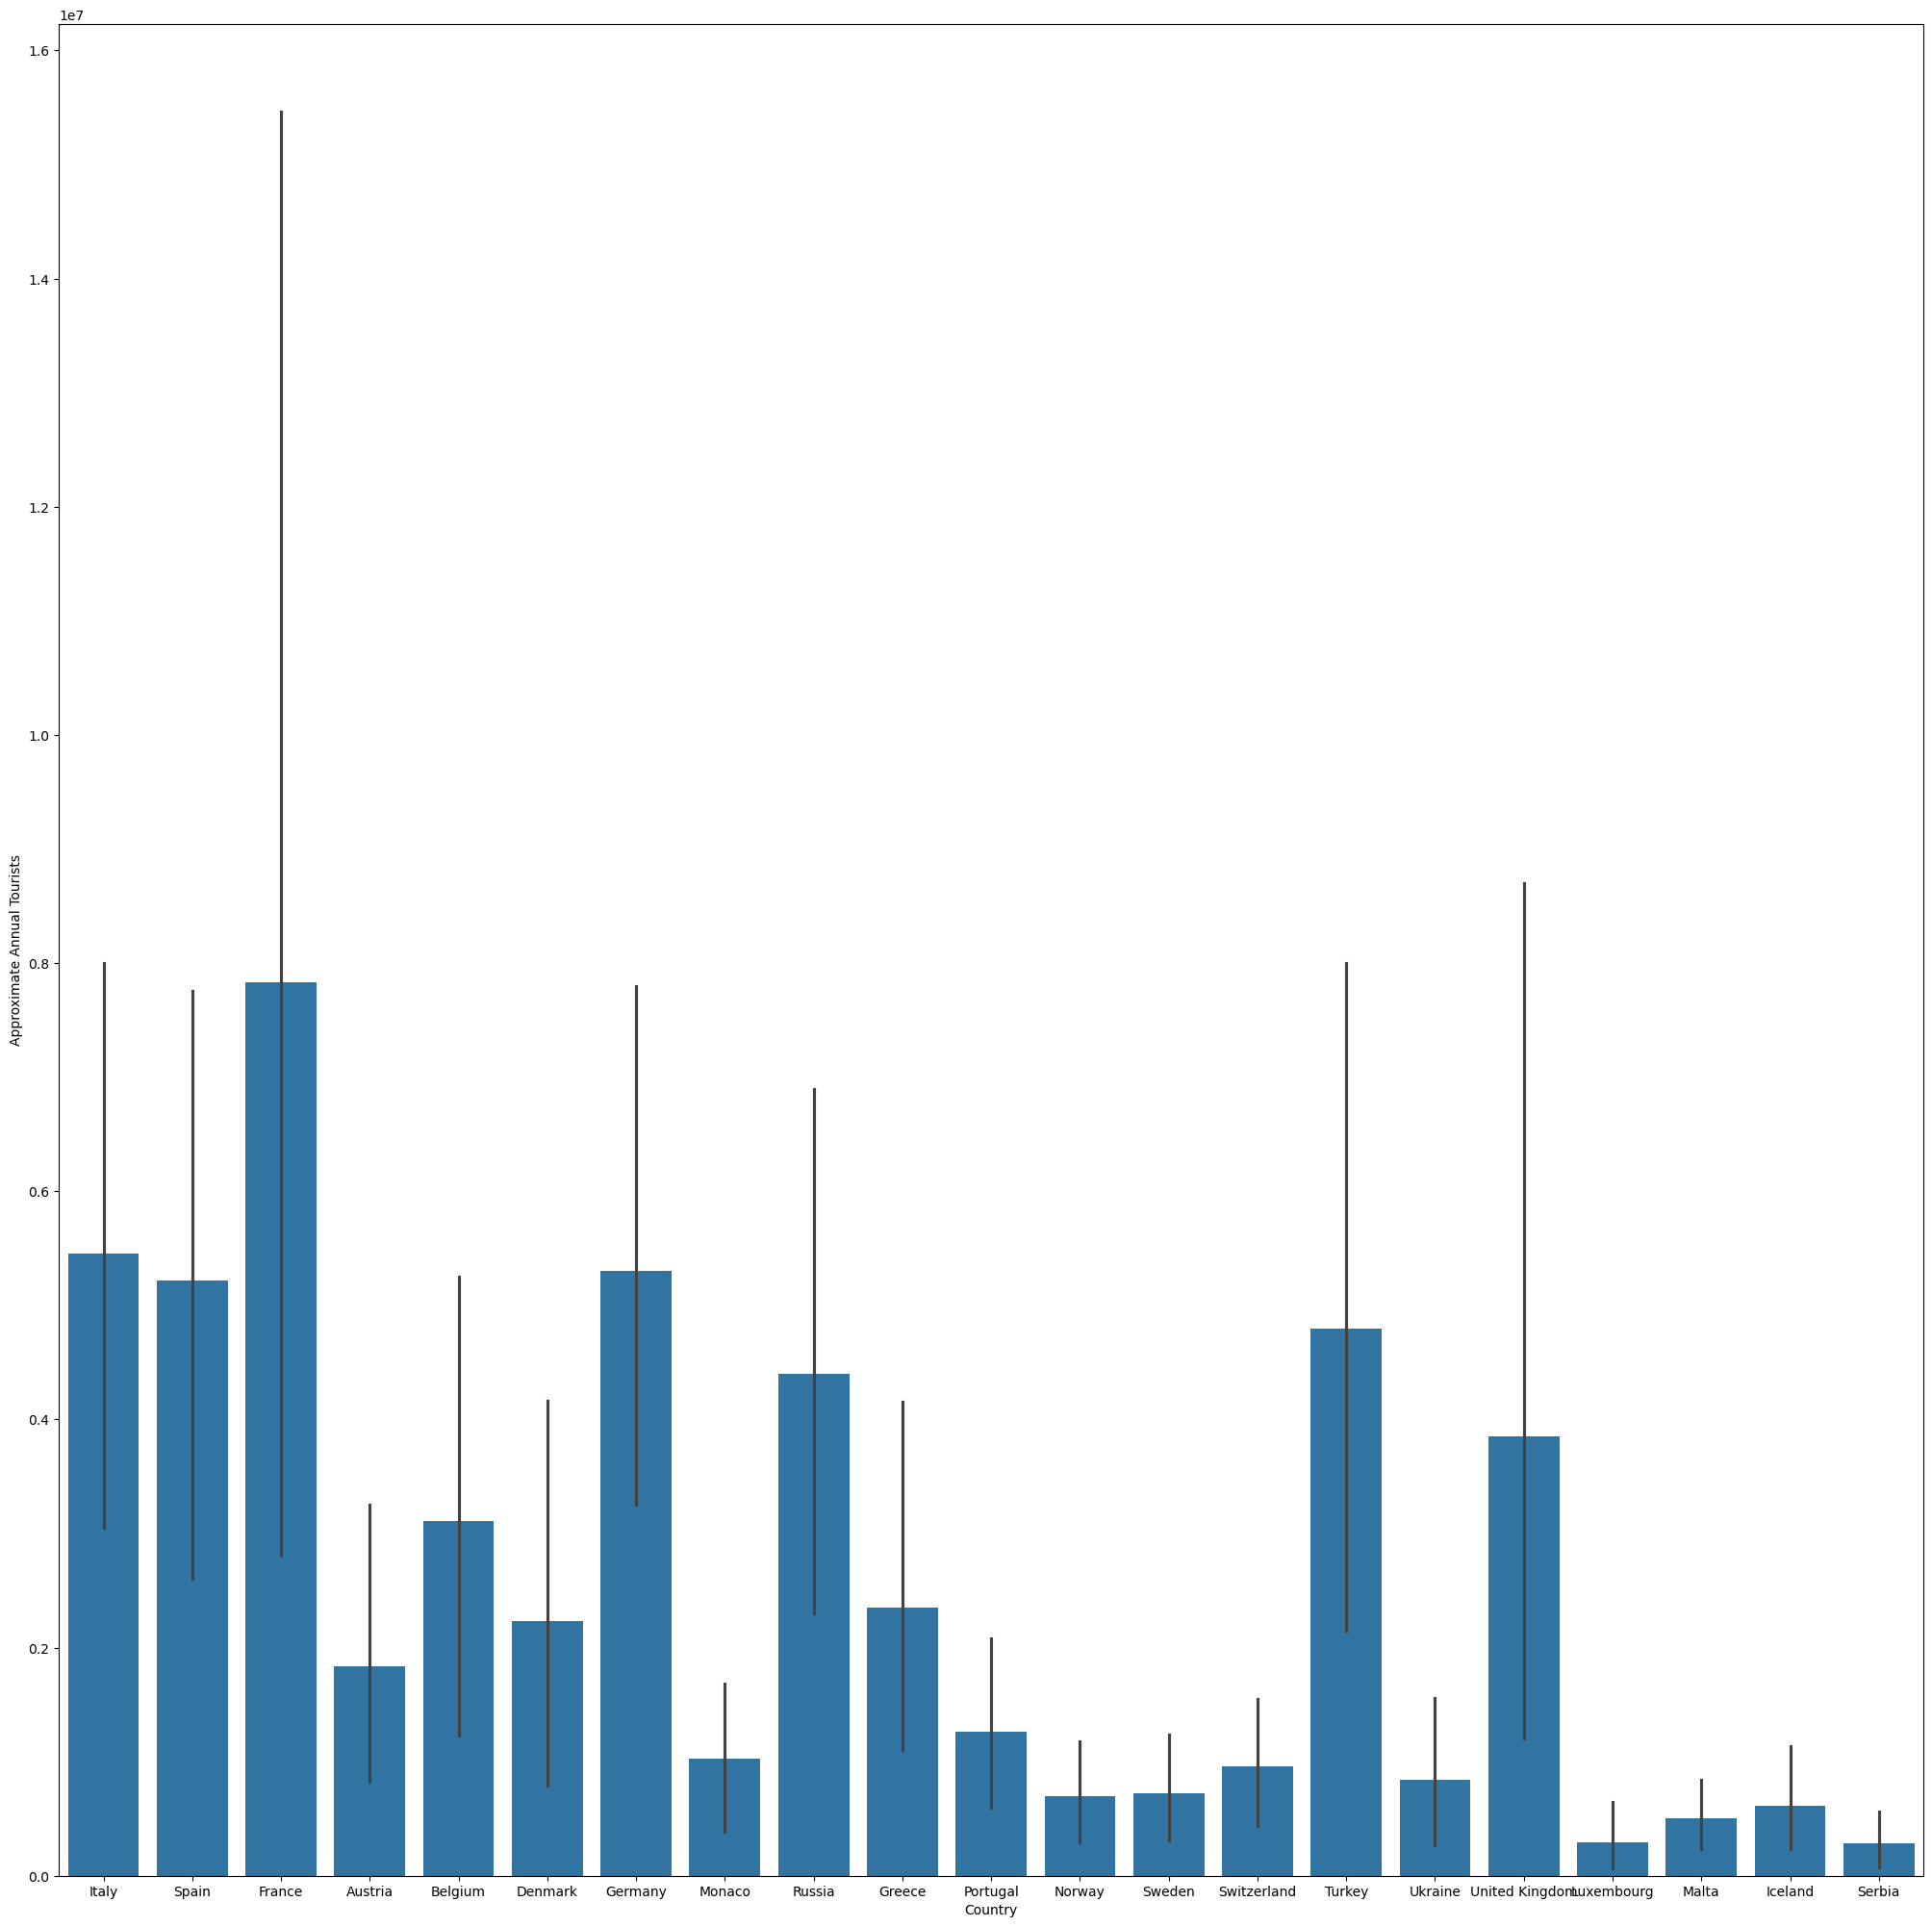

In [21]:
plt.figure(figsize=(25,25))
sns.barplot(df,x='Country',y='Approximate Annual Tourists')

<Axes: xlabel='Country', ylabel='Safety'>

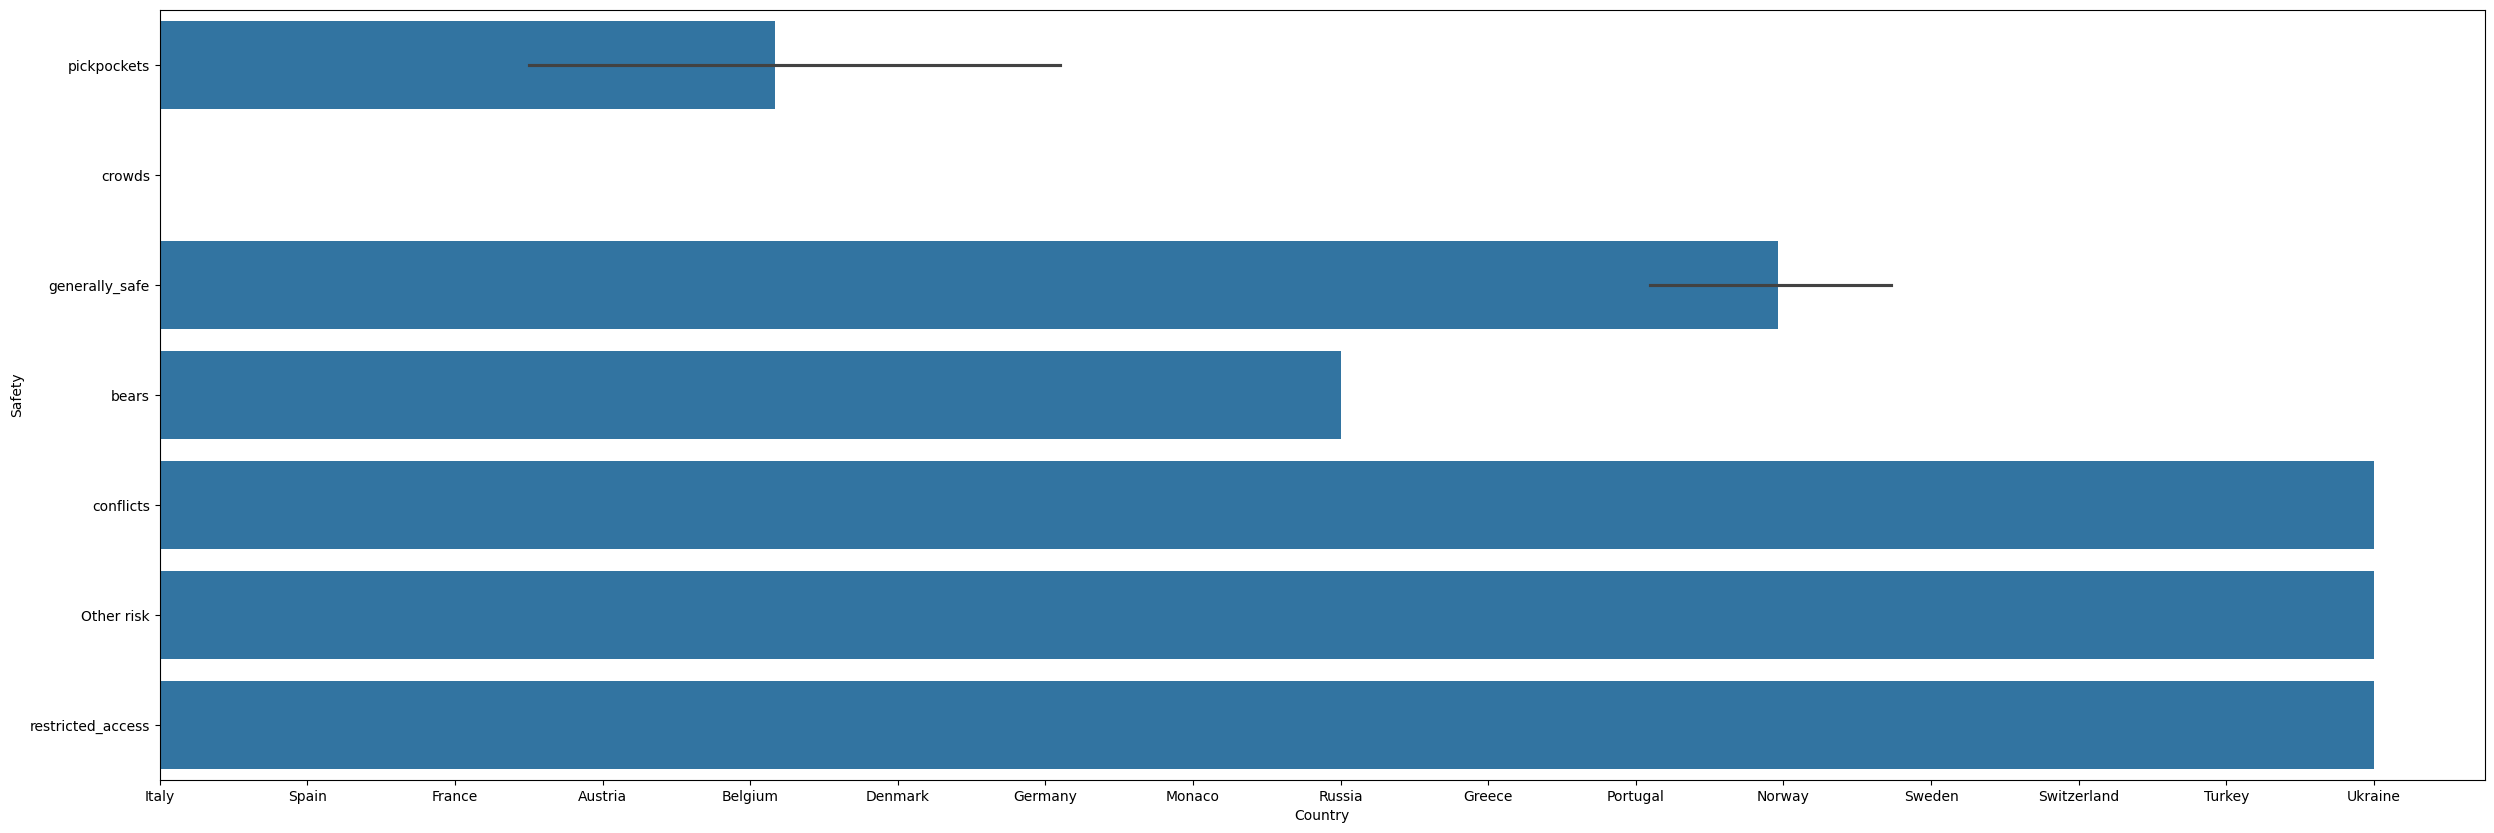

In [22]:
plt.figure(figsize=(30,10))
sns.barplot(df,x='Country',y='Safety',orient='h')

The Barplot above shows the crime rate in a particular country with their specific major crimes encountered.
Note: The chart is in horizontal orientation.

# The Most Common Crime In France and their Religion

I created a dataframe called France_df, this dataframe contains data for only the country France. This wiil allow me to single out the safety of France compared to all other countries, as well as identify the major religion.

In [23]:
France_df=df[df['Country']=="France"]
France_df.head(2)

,Destination,Region,Country,Category,Latitude,Longitude,Approximate Annual Tourists,Currency,Majority Religion,Language,Best Time to Visit,Cost of Living,Safety
20,Paris,?le-de-France,France,City,48.856614,2.352222,40000000,eur,roman catholic,French,fall,high,pickpockets
21,Nice,Provence-Alpes-C“te d'Azur,France,Coastal City,43.703761,7.268731,4000000,eur,roman catholic,French,fall,medium_high,pickpockets


<Axes: xlabel='Safety', ylabel='Count'>

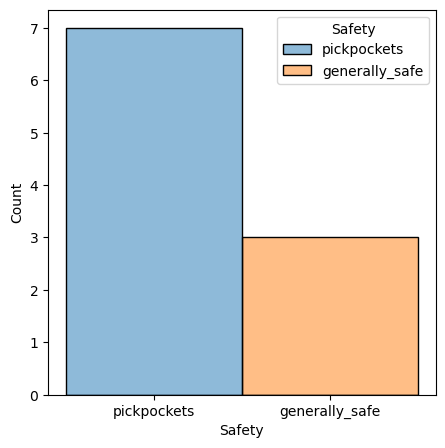

In [24]:
plt.figure(figsize=(5,5))
sns.histplot(France_df,x='Safety',hue='Safety')

With the Histplot above, it is quite obvious that the rate of pickpockets is high in France.

<Axes: xlabel='Safety', ylabel='Count'>

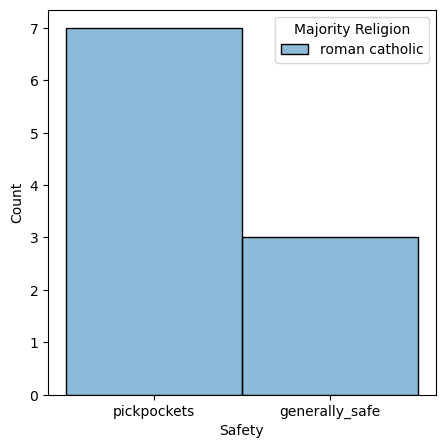

In [25]:
plt.figure(figsize=(5,5))
sns.histplot(France_df,x='Safety',hue='Majority Religion')

The Religion in France is only Roman Catholic therefore the pick_pockets are all Roman Catholics.

# Countries And Their Crime Rates With Respect To Religion

This Barplot below displays the countries ranked by their safety and major crimes in each country, with respect to the Majority Religion.

<Axes: xlabel='Country', ylabel='Majority Religion'>

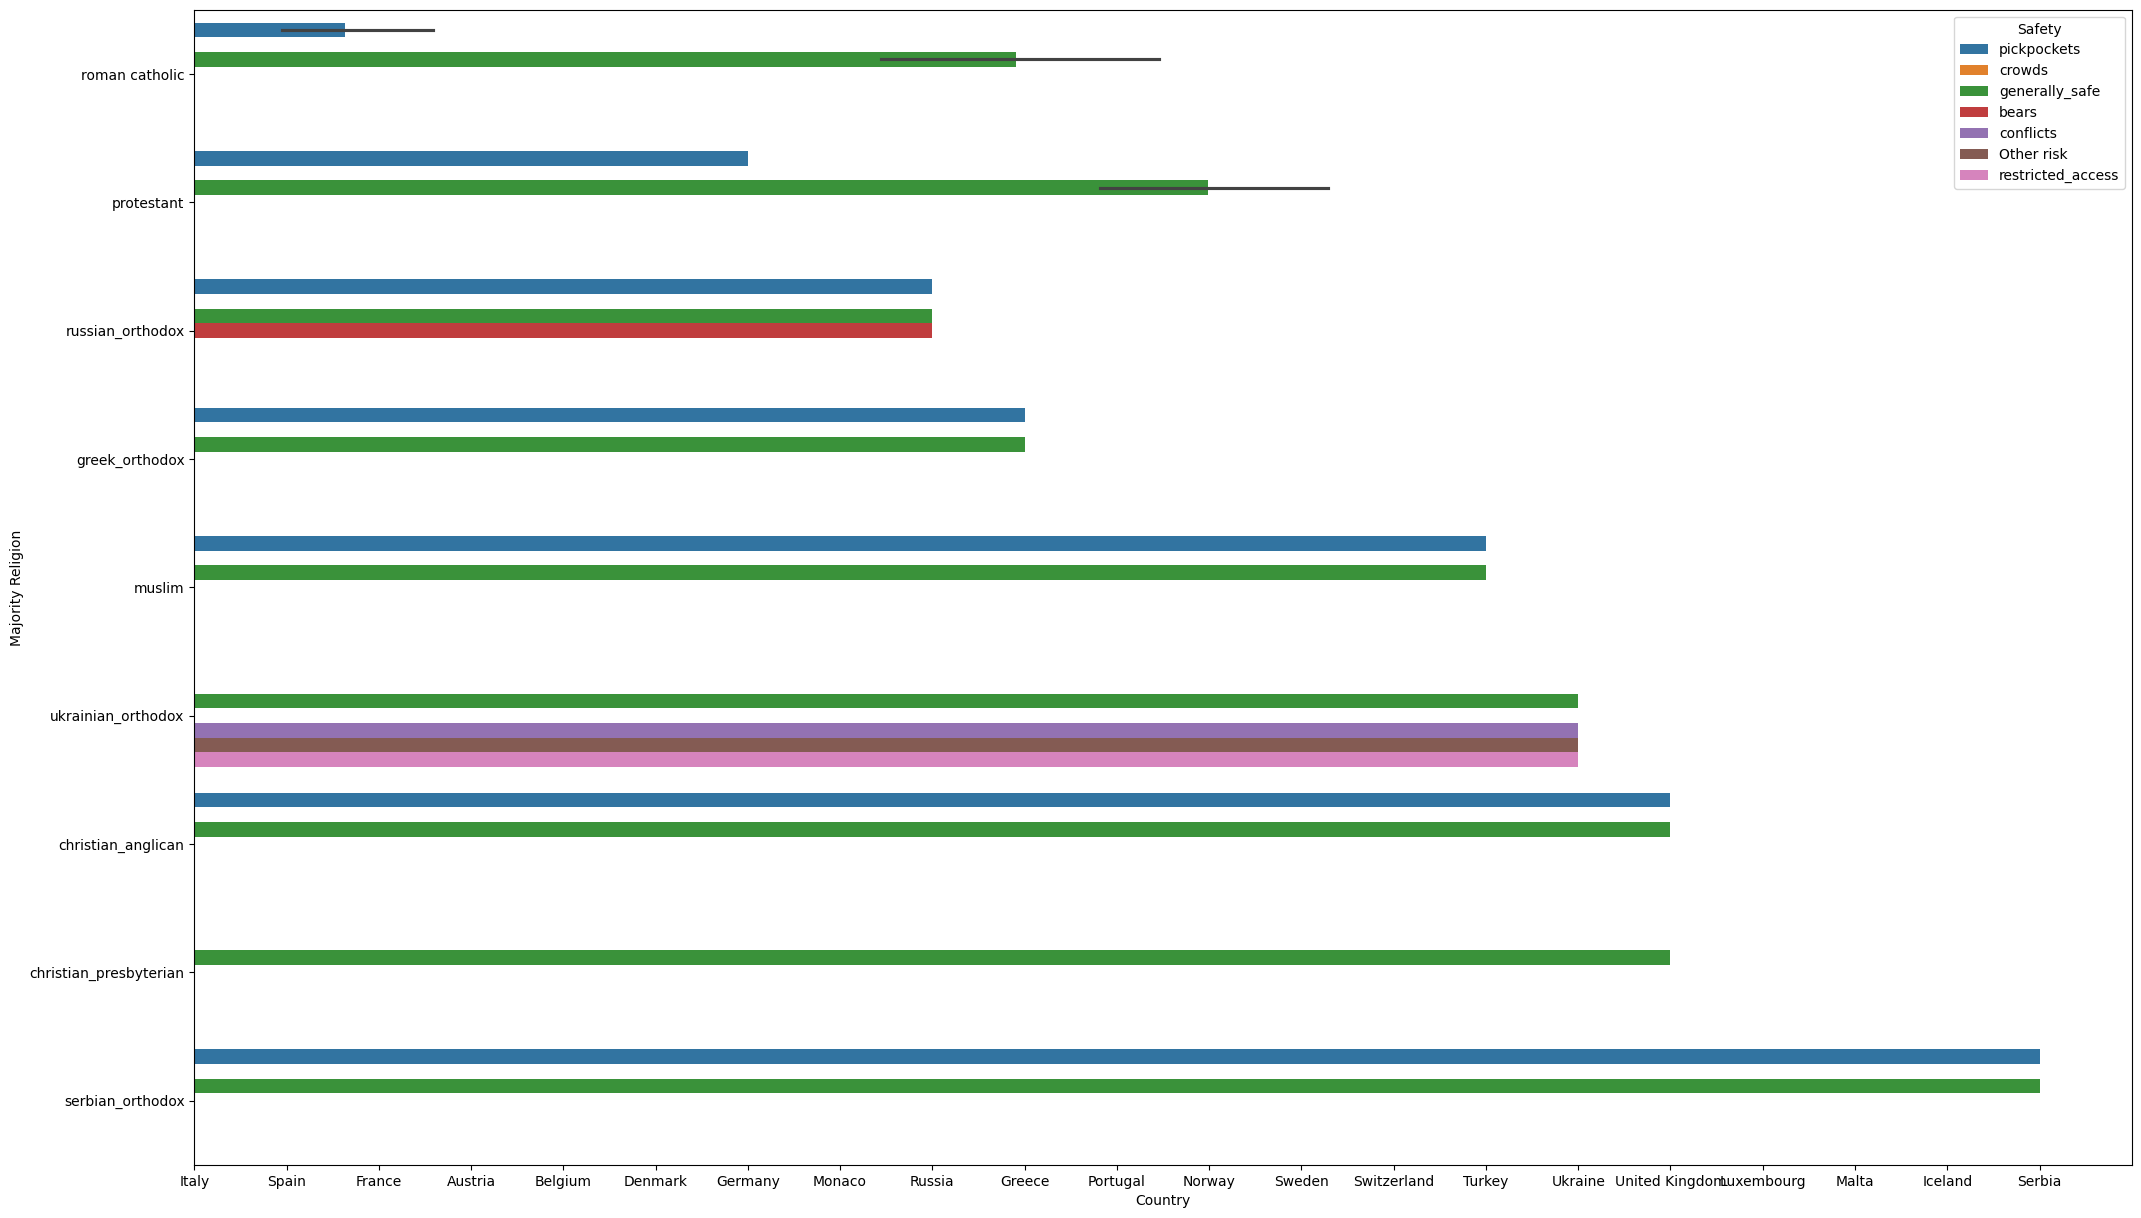

In [26]:
plt.figure(figsize=(25,15))
sns.barplot(df,x='Country',y='Majority Religion',hue='Safety',orient='h')

# Top Most visited Countries

 sort_value is used to find a particular column of the top most visited country based on approximate annual tourists.

In [27]:
df10=df.sort_values('Approximate Annual Tourists',ascending=False,ignore_index=True)
df10.head(11)

,Destination,Region,Country,Category,Latitude,Longitude,Approximate Annual Tourists,Currency,Majority Religion,Language,Best Time to Visit,Cost of Living,Safety
0,Paris,?le-de-France,France,City,48.856614,2.352222,40000000,eur,roman catholic,French,fall,high,pickpockets
1,London,Greater London,United Kingdom,City,51.507351,-0.127758,25000000,gbp,christian_anglican,English,spring/fall,high,pickpockets
2,Istanbul,Istanbul,Turkey,City,41.008238,28.978359,15000000,try,muslim,Turkish,spring/fall,medium_high,pickpockets
3,Rome,Lazio,Italy,City,41.902782,12.496366,14000000,eur,roman catholic,Italian,fall,medium_high,pickpockets
4,Berlin,Berlin,Germany,City,52.520008,13.404954,13500000,eur,protestant,German,fall,medium_high,pickpockets
5,Barcelona,Catalonia,Spain,City,41.385064,2.173135,12700000,eur,roman catholic,Spanish,fall,medium_high,pickpockets
6,Moscow,Moscow Oblast,Russia,City,55.755796,37.617315,12500000,rub,russian_orthodox,Russian,spring_fall,medium_high,pickpockets
7,French Alps,Auvergne-Rh“ne-Alpes,France,Mountain Range,45.192308,6.619079,12000000,eur,roman catholic,French,"Winter (Dec-Mar) for skiing, Summer (Jun-Sept)",medium_high,generally_safe
8,Majorca,Balearic Islands,Spain,Island,39.363371,3.014272,12000000,eur,roman catholic,Spanish,fall,medium_high,pickpockets
9,Golden Ring,Central Russia,Russia,Region,56.021562,39.624312,10000000,rub,russian_orthodox,Russian,spring_fall,medium,generally_safe


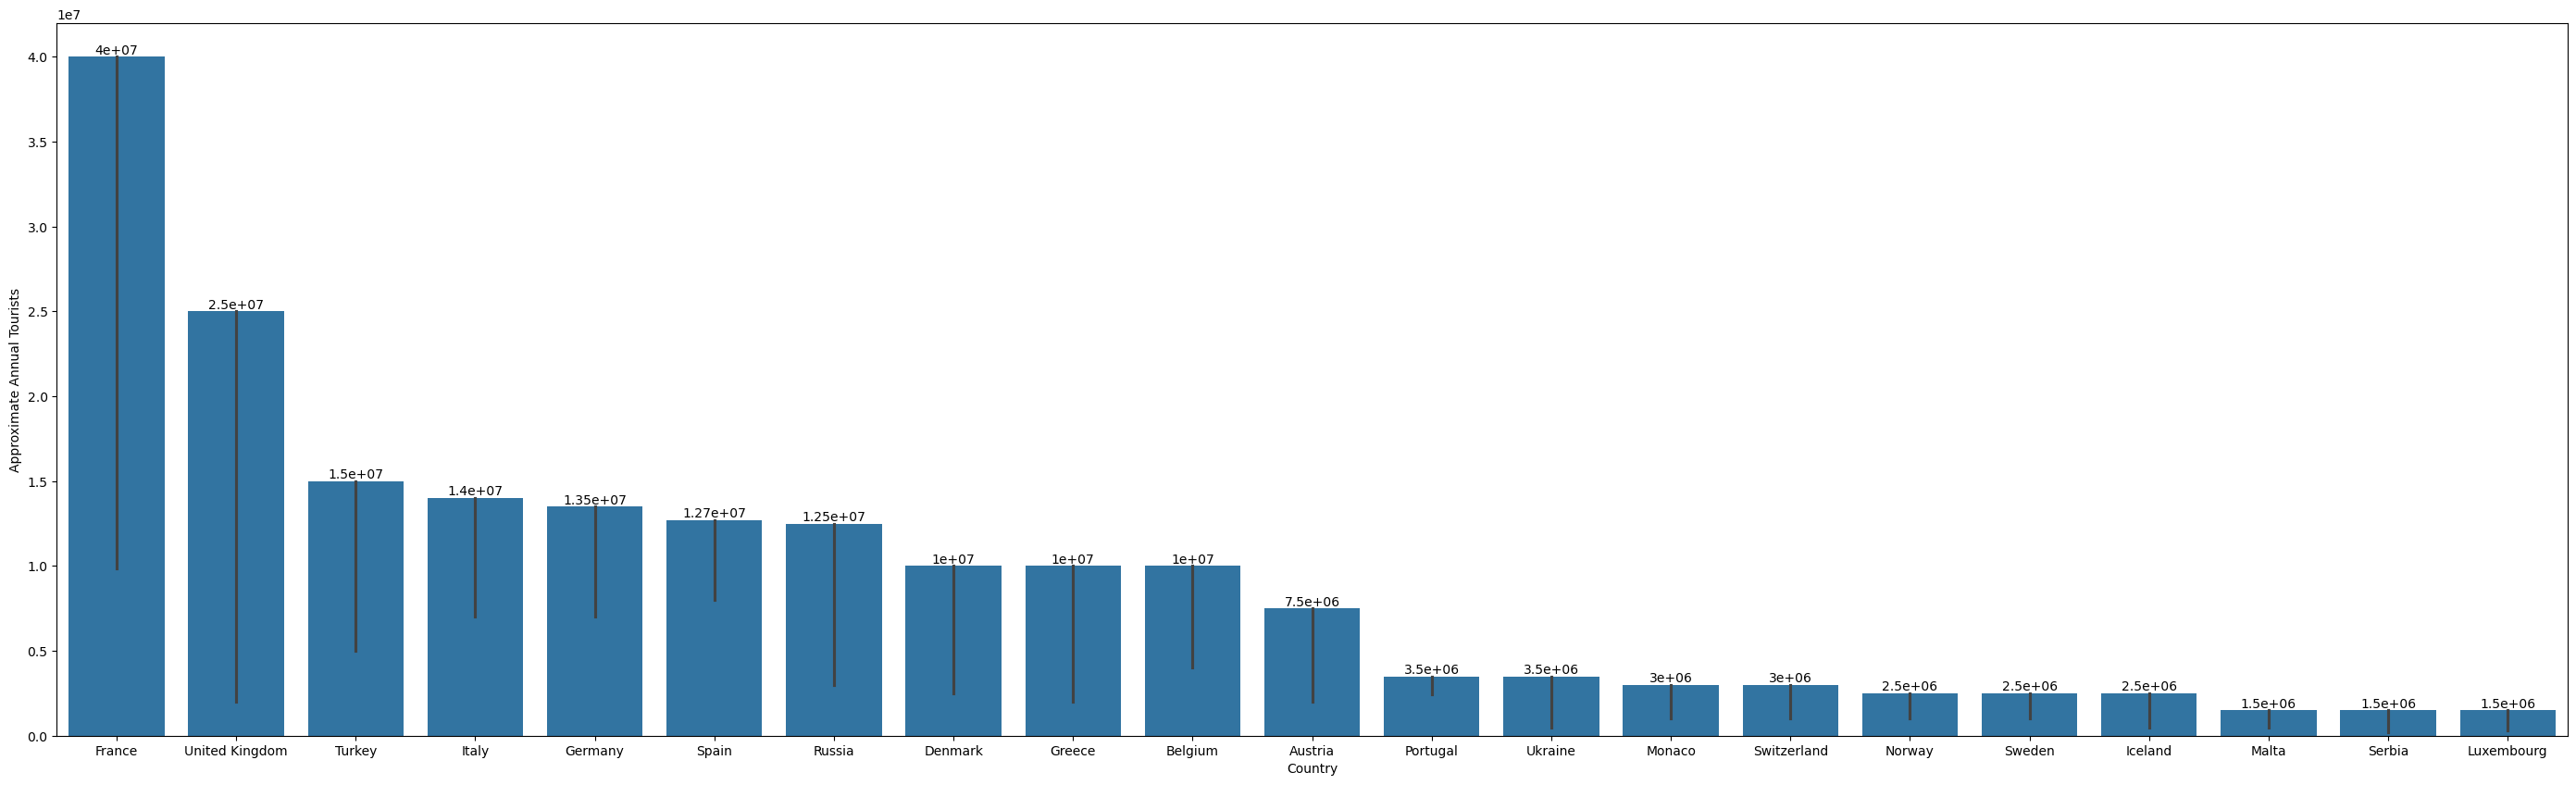

In [28]:
plt.figure(figsize=(35,10))

ax=sns.barplot(df10,x='Country', y ='Approximate Annual Tourists',estimator='max')

for i in ax.containers:
    ax.bar_label(i, label_type = 'edge')

# Relationship between Language and Country

I created a new dataframe called df2. This displays countries as well as their major spoken languge.

In [29]:
df2=df.sort_values('Approximate Annual Tourists',ascending=False).head(10)
df2

,Destination,Region,Country,Category,Latitude,Longitude,Approximate Annual Tourists,Currency,Majority Religion,Language,Best Time to Visit,Cost of Living,Safety
20,Paris,?le-de-France,France,City,48.856614,2.352222,40000000,eur,roman catholic,French,fall,high,pickpockets
160,London,Greater London,United Kingdom,City,51.507351,-0.127758,25000000,gbp,christian_anglican,English,spring/fall,high,pickpockets
140,Istanbul,Istanbul,Turkey,City,41.008238,28.978359,15000000,try,muslim,Turkish,spring/fall,medium_high,pickpockets
0,Rome,Lazio,Italy,City,41.902782,12.496366,14000000,eur,roman catholic,Italian,fall,medium_high,pickpockets
60,Berlin,Berlin,Germany,City,52.520008,13.404954,13500000,eur,protestant,German,fall,medium_high,pickpockets
10,Barcelona,Catalonia,Spain,City,41.385064,2.173135,12700000,eur,roman catholic,Spanish,fall,medium_high,pickpockets
80,Moscow,Moscow Oblast,Russia,City,55.755796,37.617315,12500000,rub,russian_orthodox,Russian,spring_fall,medium_high,pickpockets
29,French Alps,Auvergne-Rh“ne-Alpes,France,Mountain Range,45.192308,6.619079,12000000,eur,roman catholic,French,"Winter (Dec-Mar) for skiing, Summer (Jun-Sept)",medium_high,generally_safe
18,Majorca,Balearic Islands,Spain,Island,39.363371,3.014272,12000000,eur,roman catholic,Spanish,fall,medium_high,pickpockets
87,Golden Ring,Central Russia,Russia,Region,56.021562,39.624312,10000000,rub,russian_orthodox,Russian,spring_fall,medium,generally_safe


<Axes: xlabel='Country', ylabel='Count'>

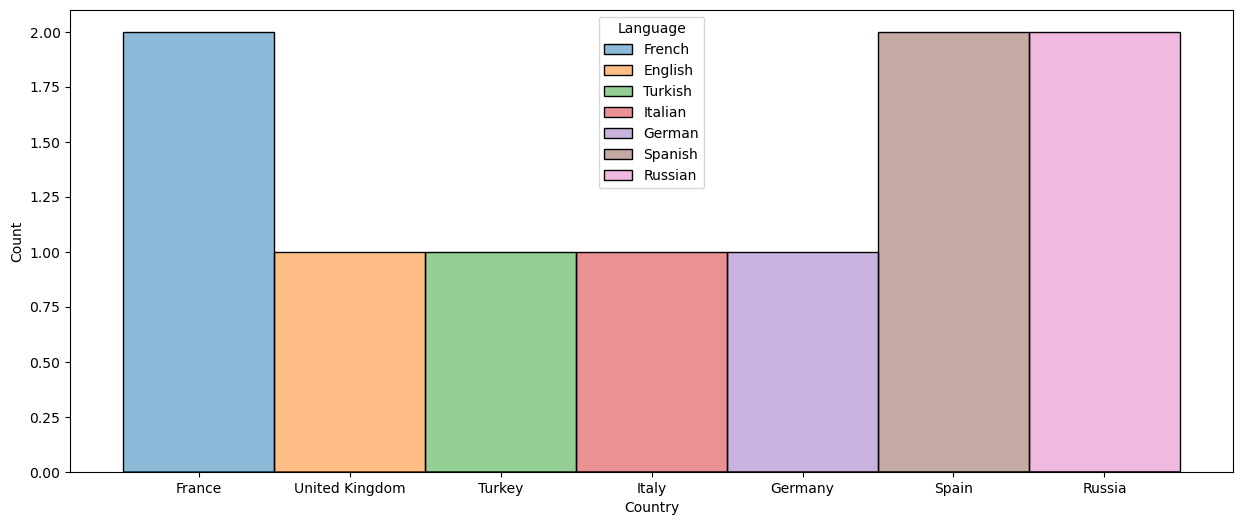

In [30]:
plt.figure(figsize=(15,6))
sns.histplot(df2,hue='Language', x='Country')

# Cost of Living In Italy

In [31]:
df['Country'].unique()

array(['Italy', 'Spain', 'France', 'Austria', 'Belgium', 'Denmark',
       'Germany', 'Monaco', 'Russia', 'Greece', 'Portugal', 'Norway',
       'Sweden', 'Switzerland', 'Turkey', 'Ukraine', 'United Kingdom',
       'Luxembourg', 'Malta', 'Iceland', 'Serbia'], dtype=object)

In [32]:
df_ITALY= df[df['Country']=='Italy']
df_ITALY.head()

,Destination,Region,Country,Category,Latitude,Longitude,Approximate Annual Tourists,Currency,Majority Religion,Language,Best Time to Visit,Cost of Living,Safety
0,Rome,Lazio,Italy,City,41.902782,12.496366,14000000,eur,roman catholic,Italian,fall,medium_high,pickpockets
1,Florence,Tuscany,Italy,City,43.769581,11.255772,10000000,eur,roman catholic,Italian,fall,medium_high,pickpockets
2,Venice,Veneto,Italy,City,45.435559,12.336196,10000000,eur,roman catholic,Italian,fall,medium_high,pickpockets
3,Milan,Lombardy,Italy,City,45.464643,9.188540,7000000,eur,roman catholic,Italian,fall,high,pickpockets
4,Naples,Campania,Italy,City,40.851330,14.254720,5000000,eur,roman catholic,Italian,fall,medium,pickpockets


<Figure size 500x300 with 0 Axes>

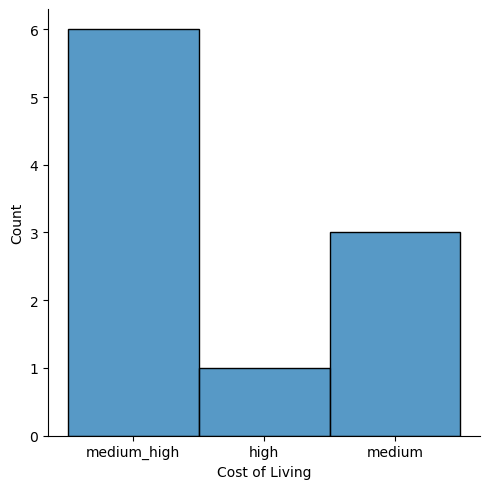

In [33]:
plt.figure(figsize=(5,3))
sns.displot(df_ITALY, x='Cost of Living')

To get the accurate cost of living in Italy, I created a new DataFrame that contains only data for Italy. Using the Displot, it can be deduced 
that the cost of living in Italy is medium-high.

# The relationship between country and cost of living

<Axes: xlabel='Country', ylabel='Count'>

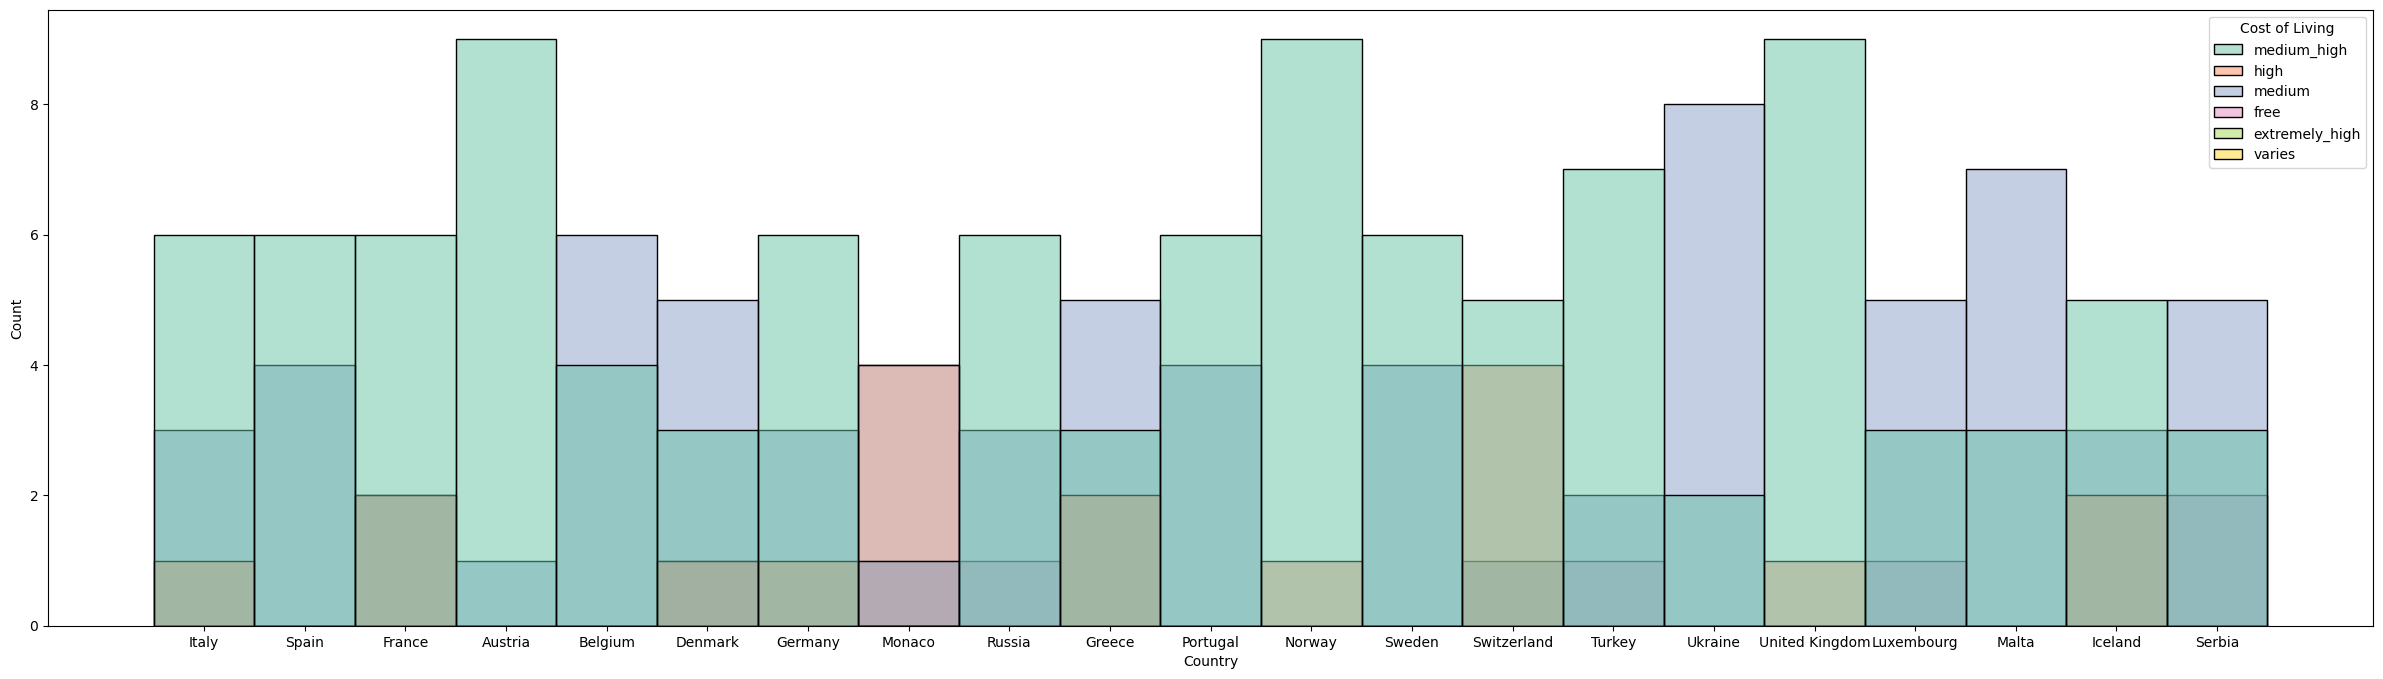

In [34]:
plt.figure(figsize=(30,8))
sns.histplot(df, x='Country',  hue='Cost of Living',palette='Set2', )

The histplot above shows all countries in the DataFrame and their respective cost of living.

# The Relationship between Countries, Approximate Annual Tourists and its Cost of living

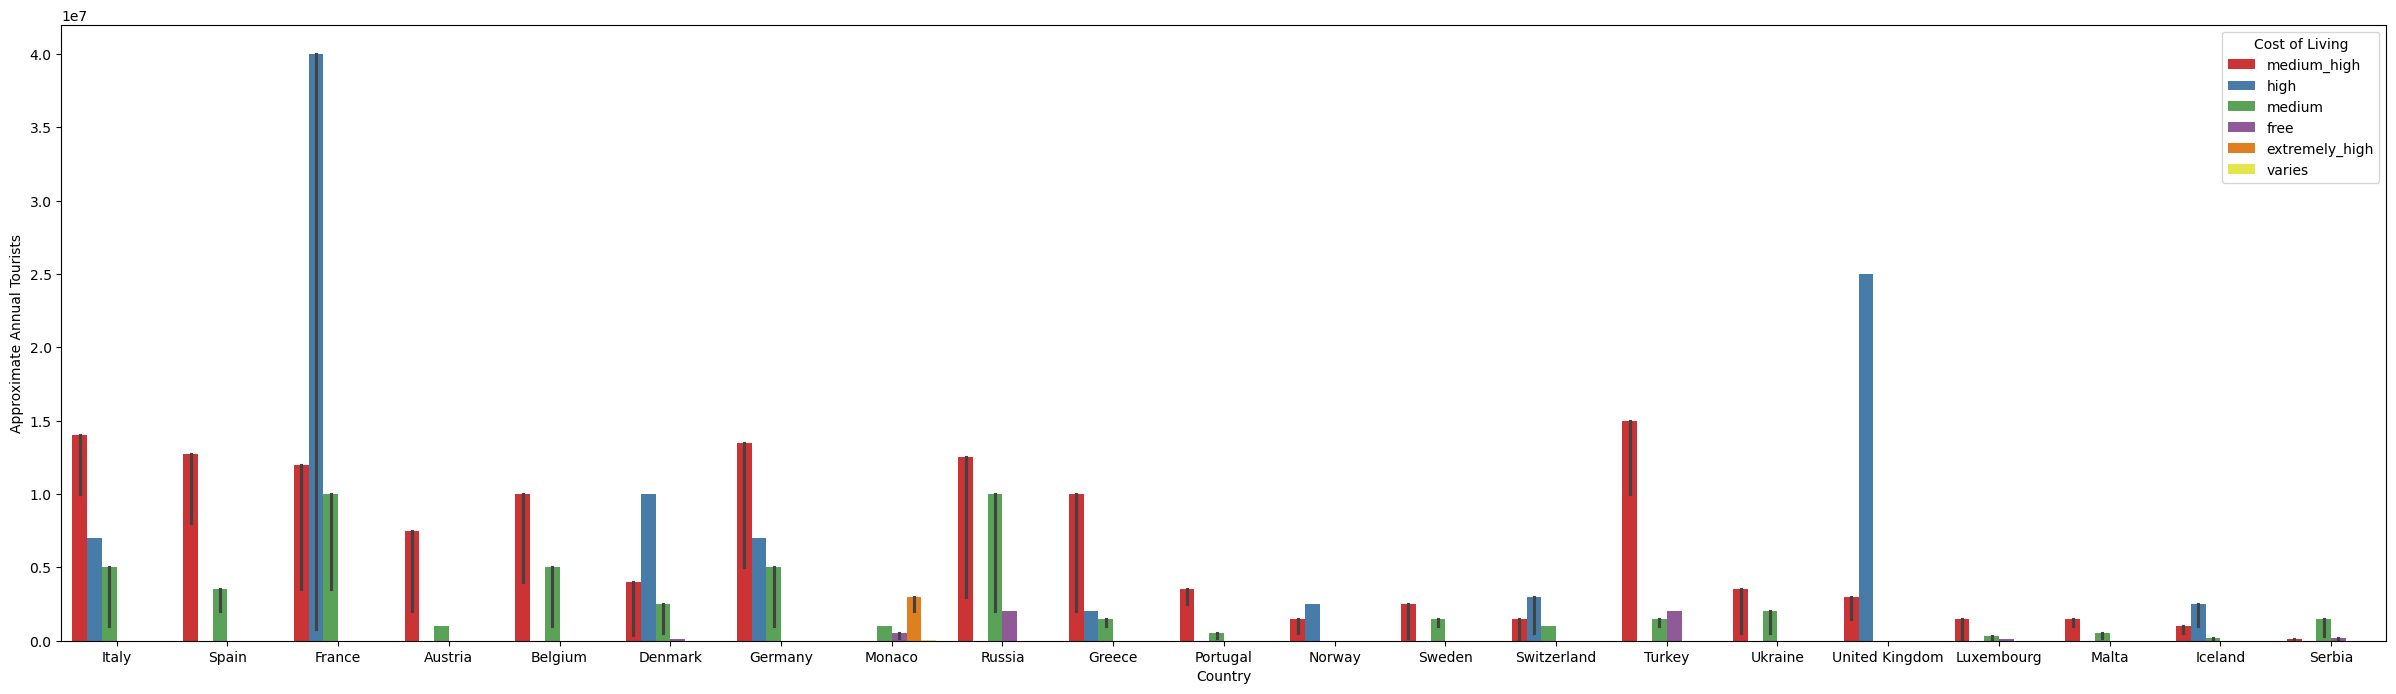

In [50]:
plt.figure(figsize=(30,8))
sns.barplot(df, x='Country',  hue='Cost of Living', y='Approximate Annual Tourists', palette='Set1', estimator='max')

The barplot above shows the Relationship between Countries, Approximate Annual Tourists and its Cost of living

# Maximum number of Approximate Annual Tourist with their Values dsiplayed

This barplot displys the maximum number of annual tourist on each bar.

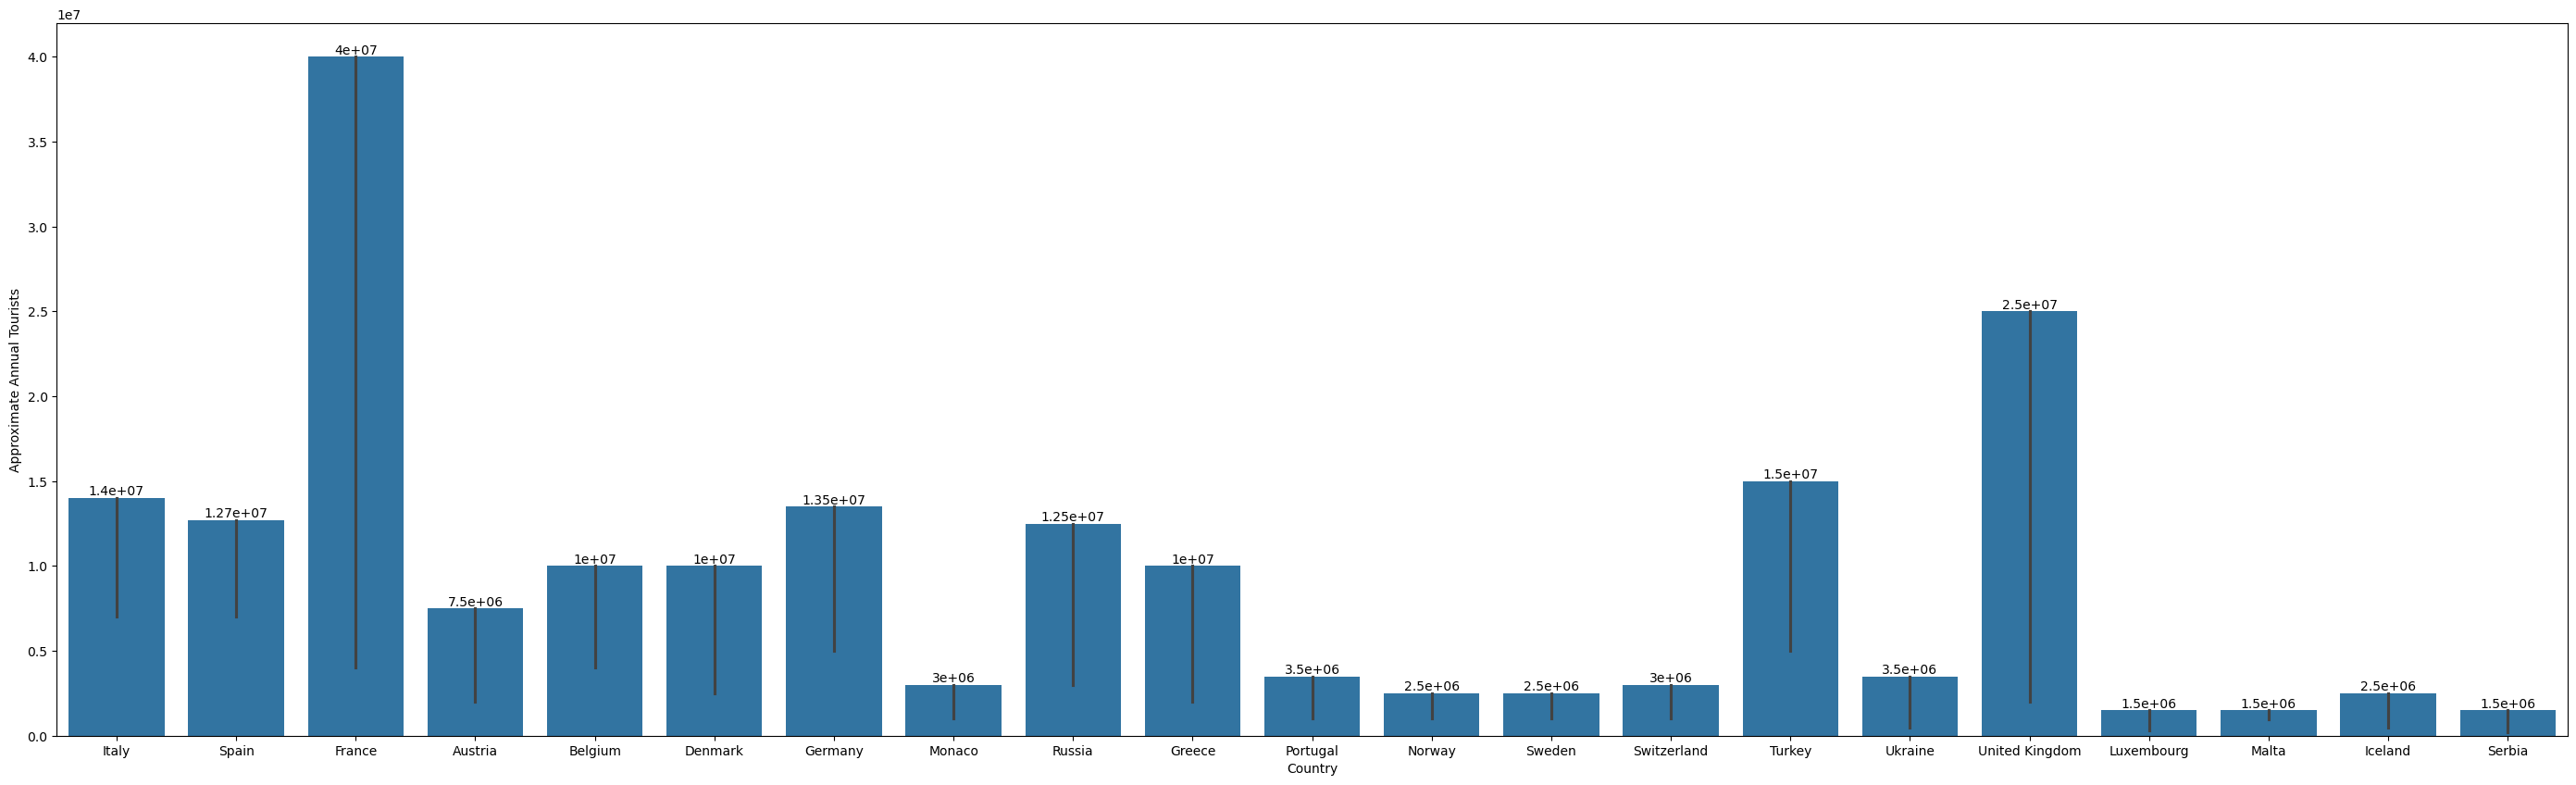

In [36]:
plt.figure(figsize=(35,10))
ax=sns.barplot(df,x='Country', y ='Approximate Annual Tourists',estimator='max')


for i in ax.containers:
    ax.bar_label(i, label_type = 'edge')

# Best time of the year to visit Italy

This histogram tells us that the best year to visit italy is during Fall

<Axes: xlabel='Country', ylabel='Best Time to Visit'>

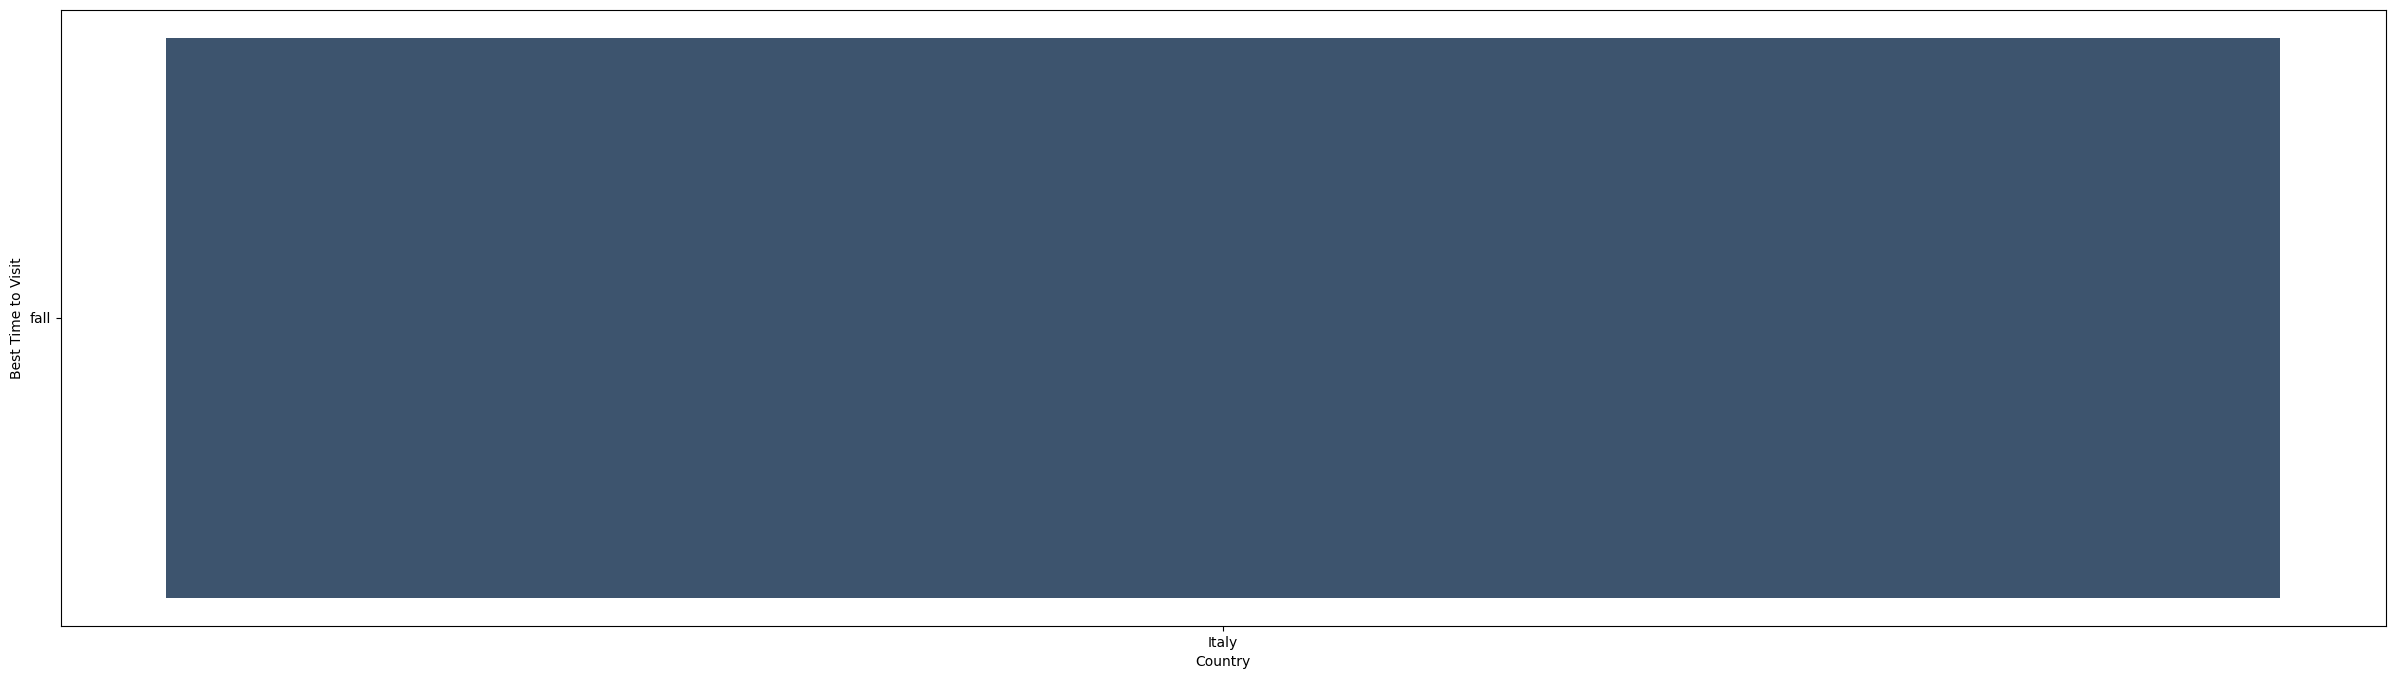

In [37]:
plt.figure(figsize=(30,8))
df_florence =  df[df['Country'] == 'Italy']
sns.histplot(df_florence, x='Country', y='Best Time to Visit')

# The most visited city in France

In [38]:
dfrance= df[df['Country'] == 'France']
dfrance.head()

,Destination,Region,Country,Category,Latitude,Longitude,Approximate Annual Tourists,Currency,Majority Religion,Language,Best Time to Visit,Cost of Living,Safety
20,Paris,?le-de-France,France,City,48.856614,2.352222,40000000,eur,roman catholic,French,fall,high,pickpockets
21,Nice,Provence-Alpes-C“te d'Azur,France,Coastal City,43.703761,7.268731,4000000,eur,roman catholic,French,fall,medium_high,pickpockets
22,Marseille,Provence-Alpes-C“te d'Azur,France,Coastal City,43.296168,5.370254,3500000,eur,roman catholic,French,fall,medium,pickpockets
23,Lyon,Auvergne-Rh“ne-Alpes,France,City,45.764048,4.835656,2000000,eur,roman catholic,French,fall,medium_high,pickpockets
24,Bordeaux,Nouvelle-Aquitaine,France,City,44.837789,-0.579180,1500000,eur,roman catholic,French,fall,medium_high,pickpockets


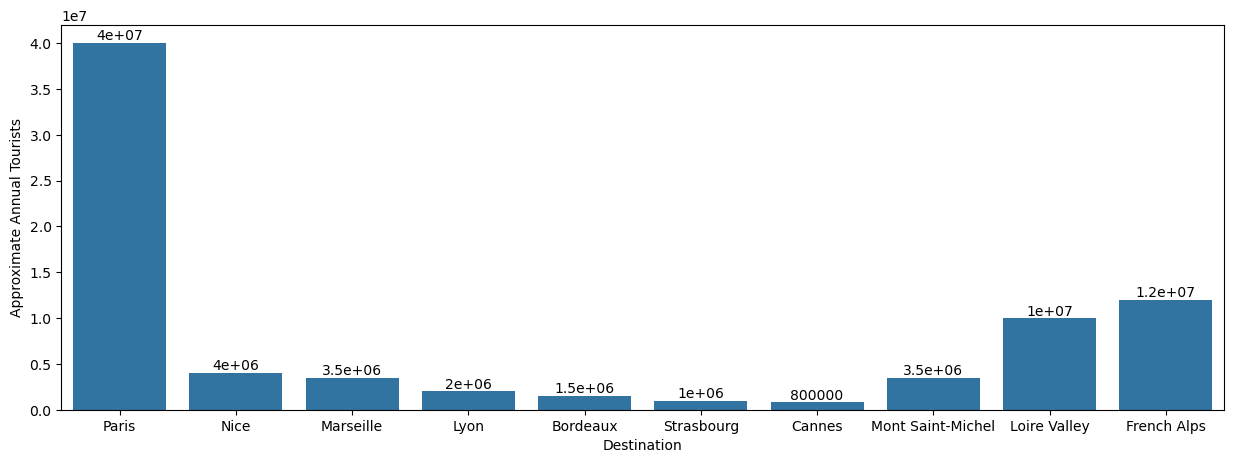

In [39]:
plt.figure(figsize=(15,5))

ax=sns.barplot(dfrance, x='Destination', y ='Approximate Annual Tourists', estimator = 'mean')

for i in ax.containers:
    ax.bar_label(i, label_type = 'edge')

The most visited city in France is Paris

# The most visited Region in France

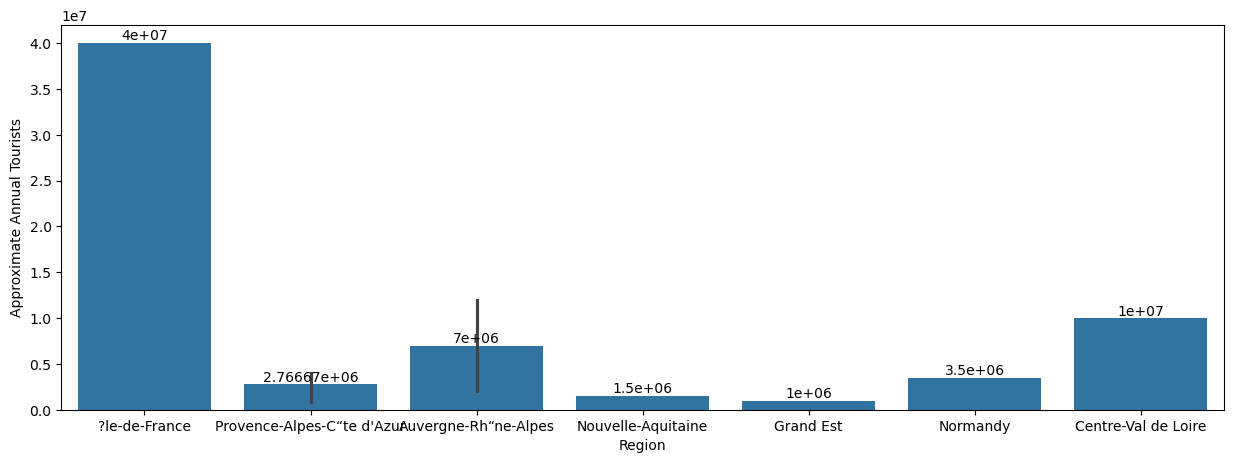

In [40]:
plt.figure(figsize=(15,5))

ax=sns.barplot(dfrance, x='Region', y ='Approximate Annual Tourists', estimator ='mean')


for i in ax.containers:
    ax.bar_label(i, label_type = 'edge')

The most visited region in France is ?le-de-france

# The most used currency by Tourists

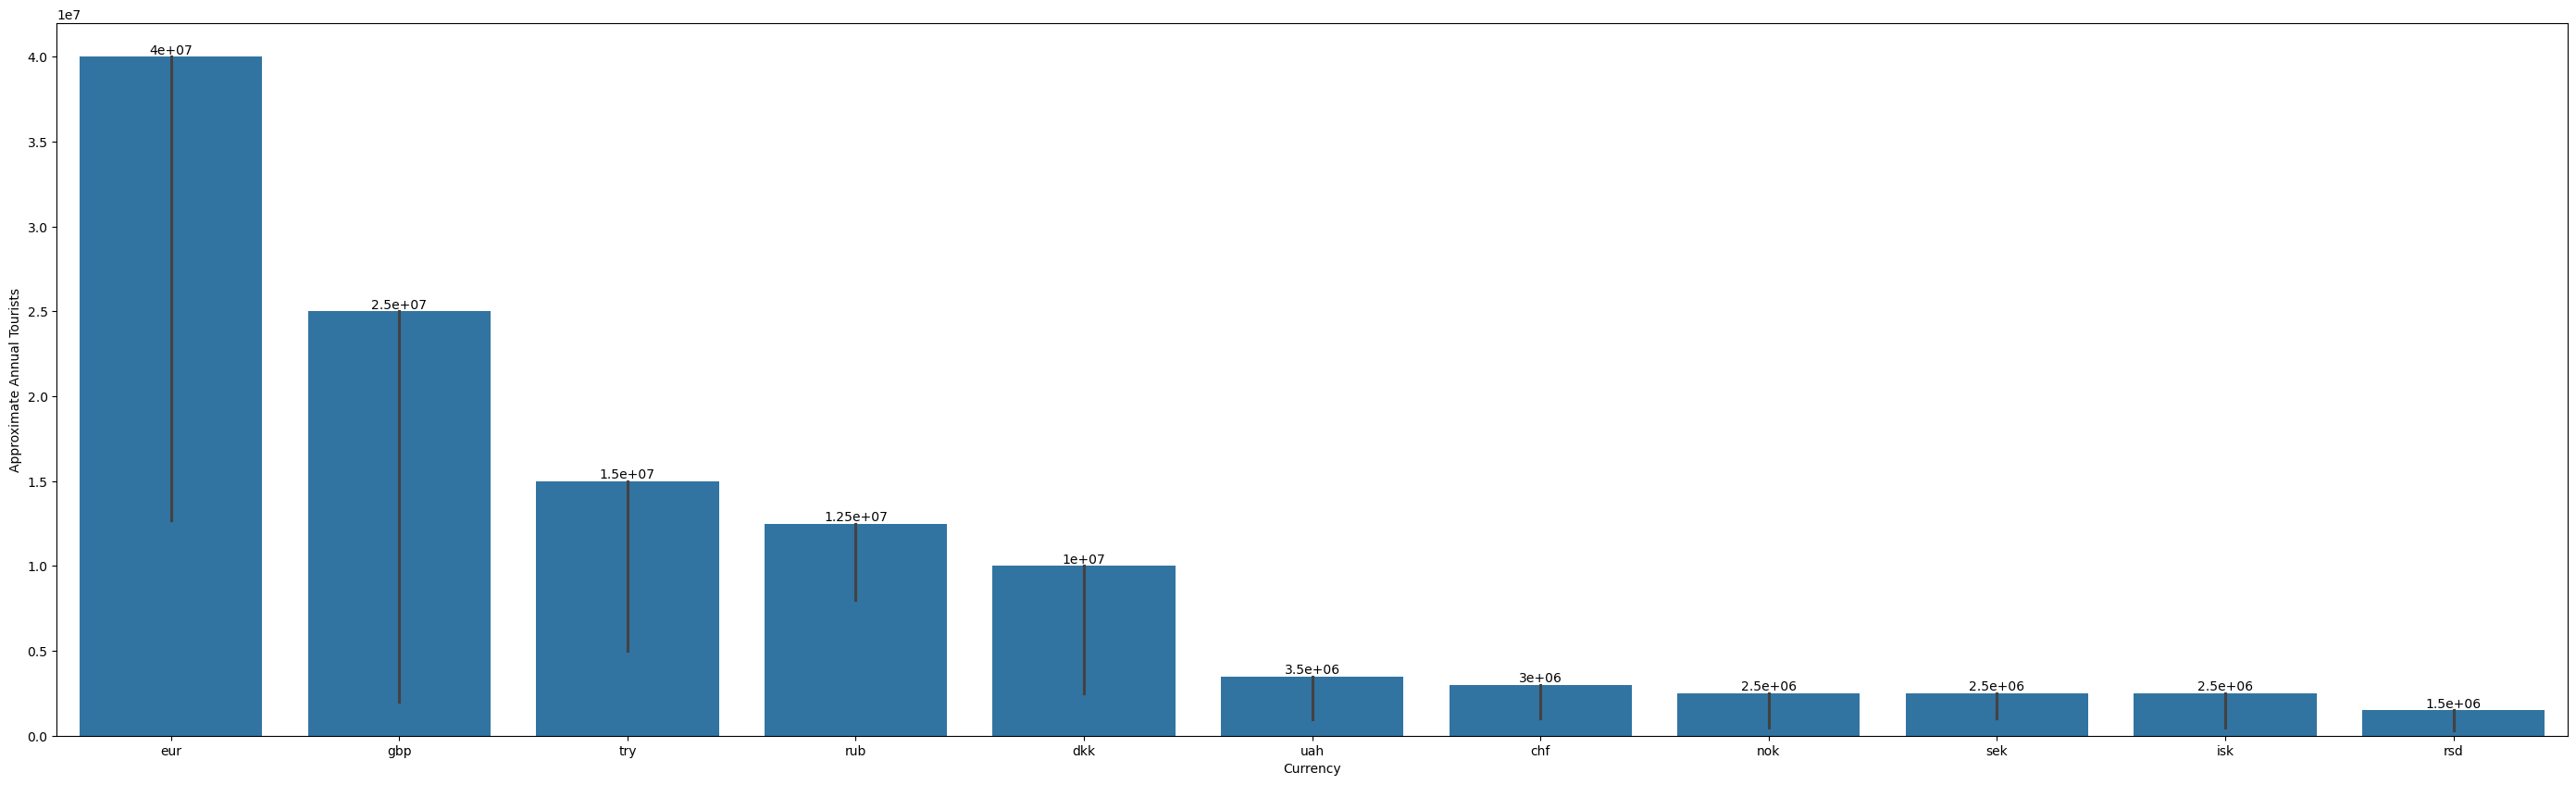

In [41]:
plt.figure(figsize=(35,10))

ax=sns.barplot(df10,x='Currency', y ='Approximate Annual Tourists',estimator='max')


for i in ax.containers:
    ax.bar_label(i, label_type = 'edge')

This barplot shows that the most used currency by tourists is EURO.

# Top 10 most visited countries

In [42]:
df10=df.sort_values('Approximate Annual Tourists',ascending=False,ignore_index=True).head(20)

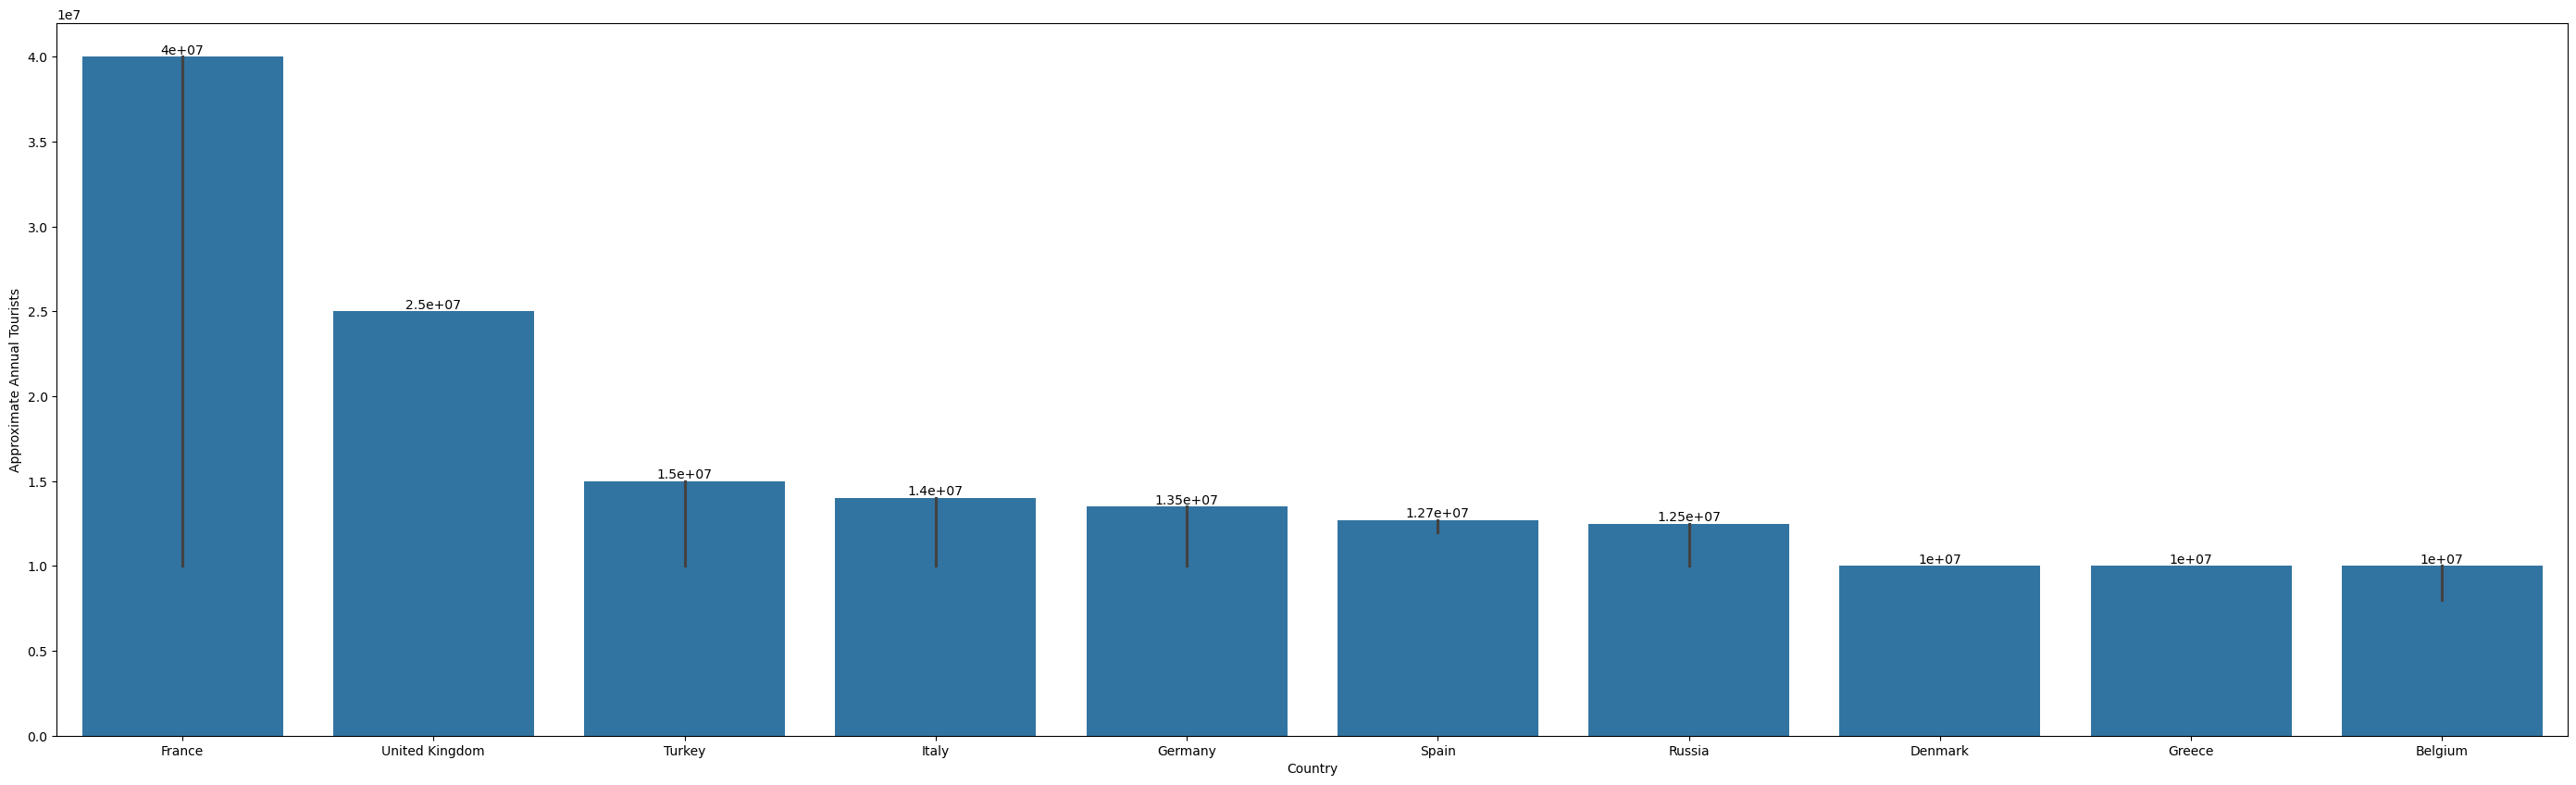

In [43]:
plt.figure(figsize=(35,10))

ax=sns.barplot(df10,x='Country', y ='Approximate Annual Tourists',estimator='max')

for i in ax.containers:
    ax.bar_label(i, label_type = 'edge')